It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying a home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

Here we'll dig a little deeper into these prices, using SQL and python to get some insight about the avocado comunity profile.


In [65]:
##Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from pandasql import sqldf
import glob
import os.path
from datetime import date
import win32com.client as win32

from datetime import date, timedelta
from random import choices
import plotly.express as px

In [66]:
#Basic infos

##INSERT HERE THE PATH FOR THE FILES 

##Folder path

prices_path = 'C:\\Users\\lucas.zannoni\\Desktop\\Lucas\\Projetos\\Other\\Python\\Avocado Prices\\'
qty_path = 'C:\\Users\\lucas.zannoni\\Desktop\\Lucas\\Projetos\\Other\\Python\\Avocado Prices\\'
buyer_path = 'C:\\Users\\lucas.zannoni\\Desktop\\Lucas\\Projetos\\Other\\Python\\Avocado Prices\\'

## File Root

prices_file = 'Avocado_Prices_per_Region.xlsx'
qty_file = 'Avocados Qty per Region.xlsx'
buyer_file = 'Avocado Buyer Profile.xlsx'

In [67]:
##CONVERT DIRECTORIES PATH TO RAW STRINGS



avocado_prices_path =  str(prices_path)  + str(prices_file)

print(avocado_prices_path)

avocado_qty_path =  str(qty_path)  + str(qty_file)
print(avocado_qty_path)

avocado_buyer_path =  str(buyer_path)  + str(buyer_file)
print(avocado_buyer_path)



C:\Users\lucas.zannoni\Desktop\Lucas\Projetos\Other\Python\Avocado Prices\Avocado_Prices_per_Region.xlsx
C:\Users\lucas.zannoni\Desktop\Lucas\Projetos\Other\Python\Avocado Prices\Avocados Qty per Region.xlsx
C:\Users\lucas.zannoni\Desktop\Lucas\Projetos\Other\Python\Avocado Prices\Avocado Buyer Profile.xlsx


In [68]:
##NOW WE'LL IMPORT THE DATABASES INTO PANDAS DATAFRAMES

prices_df = pd.read_excel(avocado_prices_path)
qty_df = pd.read_excel(avocado_qty_path)
buyer_df = pd.read_excel(avocado_buyer_path)


FINAL DATABASE:

In [69]:
##NOW WE'LL CONSOLIDATE OUR DIFFERENT DATAFRAMES INTO ONE
##FOR THAT I'LL USE A SQL QUERY

final_df = sqldf('''

SELECT 
                prices_db.region,	
                DATE(prices_db.Date) as DATE,	
                --Here i'll artificialy increase the organic price, since it tends to be more expensive than the usual avocado
                case when qty_db.type in ('organic') then prices_db.AveragePrice*1.03 else prices_db.AveragePrice end as AveragePrice,
                qty_db.'Small Bags'	as 'Small Bags Qty',
                qty_db.'Large Bags'	as 'Large Bags Qty',
                qty_db.type,
                buyer_db.'Predominant Buyer Gender',	
                buyer_db.'Average Buyer Age'

        
                FROM prices_df prices_db
                
                
                
                --HERE I HAVE TO GUARANTEE THAT I'LL HAVE THE CORRECT KEY FIELDS SELECTED FOR EACH JOIN

                LEFT JOIN qty_df qty_db on (prices_db.region = qty_db.region  AND prices_db.Date = qty_db.Date)

                LEFT JOIN buyer_df buyer_db on (prices_db.region = buyer_db.region  AND prices_db.Date = buyer_db.Date)
                
                -- REMOVES ANY LINES WITH NO CORRESPONDENCE IN THE 3 TABLES
                WHERE          
                qty_db.type NOT IN ('NULL') AND
                buyer_db.'Predominant Buyer Gender' NOT IN ('NULL')
''')

print('Now we have our final db:')
display(final_df)

Now we have our final db:


,region,DATE,AveragePrice,Small Bags Qty,Large Bags Qty,type,Predominant Buyer Gender,Average Buyer Age
0,Albany,2015-12-27,1.3390,8603.62,93.25,organic,Male,17
1,Albany,2015-12-20,0.8961,9408.07,97.49,organic,Female,25
2,Albany,2015-12-13,1.5141,8042.21,103.14,organic,Female,18
3,Albany,2015-12-06,1.2566,5677.40,133.76,organic,Female,23
4,Albany,2015-11-29,1.1200,5986.26,197.69,conventional,Female,20
...,...,...,...,...,...,...,...,...
9121,WestTexNewMexico,2018-02-04,1.4523,127833.03,229786.03,organic,Female,19
9122,WestTexNewMexico,2018-01-28,1.0200,143430.96,147376.43,conventional,Female,15
9123,WestTexNewMexico,2018-01-21,1.5141,118978.50,209131.06,organic,Male,26
9124,WestTexNewMexico,2018-01-14,1.1000,125408.69,162040.02,conventional,Male,26


Now that we have our consolidated DB, we can begin getting some insights from our data.

AVOCADO LOVER BUYER PROFILE:

The main gender profile of the avocado lovers comunity over time is Female as can be seen below:


,Predominant Buyer Gender,count
0,Female,4573
1,Male,4553


Looking at the data, we can see that we have an even distribution on the avocado main buyers per year, which means that
mostly everyone must LOVE avocado toast.

It is also nice to see its evolution through time:


,Year,Female Number [%],Male Number [%]
0,2015,49.68,50.32
1,2016,51.00,49.00
2,2017,49.30,50.70
3,2018,51.70,48.30


Here we can see the visuals of the data above:


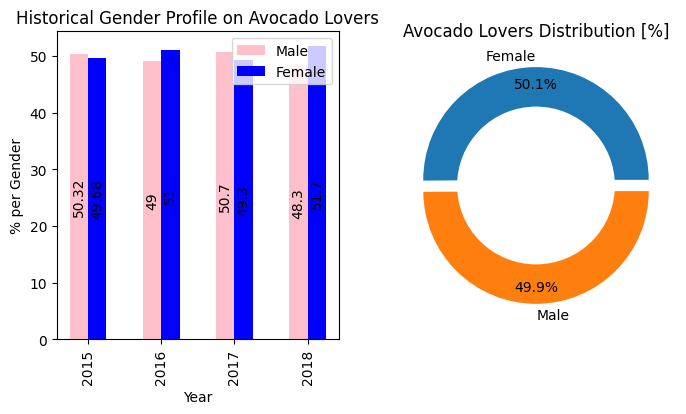

In [70]:
##AVOCADO LOVER BUYER PROFILE
##HERE WE WANT TO DEFINE THE GENDER OF THE AVERAGE AVOCADO LOVER

##First we'll get an all-time gender percentage
gender_through_time= sqldf('''

Select final_db.'Predominant Buyer Gender', COUNT(final_db.'Predominant Buyer Gender') as count
            
            from final_df final_db
            
            Group By final_db.'Predominant Buyer Gender'


''')

gender_time_series= sqldf('''

WITH FEMALE_NUMBER AS(Select final_db.'Predominant Buyer Gender',final_db.'Date', COUNT(final_db.'Predominant Buyer Gender') as count_female
            
            from final_df final_db
            
            WHERE final_db.'Predominant Buyer Gender' IN ('Female')
            Group By final_db.'Predominant Buyer Gender',final_db.'Date'),
            
            MALE_NUMBER AS(Select final_db.'Predominant Buyer Gender',final_db.'Date', COUNT(final_db.'Predominant Buyer Gender') as count_male
            
            from final_df final_db
            
            WHERE final_db.'Predominant Buyer Gender' IN ('Male')
            Group By final_db.'Predominant Buyer Gender',final_db.'Date')
                

                SELECT strftime('%Y', final_db.Date) Year, 
                        round(AVG(FEMALE_NUMBER.count_female)*100/(AVG(FEMALE_NUMBER.count_female)+AVG(MALE_NUMBER.count_male)),2) as 'Female Number [%]', 
                        round(AVG(MALE_NUMBER.count_male)*100/(AVG(FEMALE_NUMBER.count_female)+AVG(MALE_NUMBER.count_male)),2) as 'Male Number [%]'
                        
                        from final_df final_db

                        left join FEMALE_NUMBER ON (final_db.Date = FEMALE_NUMBER.Date)

                        left join MALE_NUMBER ON (final_db.Date = MALE_NUMBER.Date)

                        GROUP BY  Year
                        
                        ORDER BY Year asc



''')

print('The main gender profile of the avocado lovers comunity over time is', gender_through_time['Predominant Buyer Gender'][0],'as can be seen below:')

display(gender_through_time)

print('Looking at the data, we can see that we have an even distribution on the avocado main buyers per year, which means that')
print('mostly everyone must LOVE avocado toast.\n')
print('It is also nice to see its evolution through time:')

display(gender_time_series.head())

x = np.arange(len(gender_time_series))
width = 0.5


fig, ax = plt.subplots(1,2,figsize=(8,4))


print('Here we can see the visuals of the data above:')


##Now We'll make some graphics in order to get a better visualization of the data

##creates explode array 

my_explode = [0.05]*len(gender_through_time['count'])


##creates pie chart
ax[1].pie(gender_through_time['count'],  labels=gender_through_time['Predominant Buyer Gender'],autopct='%1.1f%%', pctdistance=0.85,  explode=my_explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig1 = plt.gcf()
 
# Adding Circle in Pie chart
fig1.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Avocado Lovers Distribution [%]')
 




# plot data in grouped manner of bar type - SALES $
ax[0].bar(x-width/4, gender_time_series['Male Number [%]'], width/2, color = 'Pink')
ax[0].bar(x+width/4, gender_time_series['Female Number [%]'], width/2, color = 'Blue')
ax[0].set_xticks(x, gender_time_series['Year'], rotation ='vertical')
ax[0].bar_label(ax[0].containers[0], label_type='center', rotation = 'vertical', color ='black')
ax[0].bar_label(ax[0].containers[1], label_type='center', rotation = 'vertical', color ='black')
ax[0].set_xlabel("Year")
ax[0].set_ylabel("% per Gender")
ax[0].set_title('Historical Gender Profile on Avocado Lovers')
ax[0].legend(['Male','Female'])


# Displaying Chart
plt.show()


AVOCADO PRICE FLUCTUATION

Now we want to investigate the variation in the avocado prices throughout the years.

For this well need to group the date by the two different avocado types in a list and then plot it.

The resulting query can be seen below.


,Year_Mon,Conventional Price,Organic Price
0,2015 01,1.306667,1.350294
1,2015 02,1.284808,1.310859
2,2015 03,1.291938,1.391450
3,2015 04,1.265772,1.314524
4,2015 05,1.321705,1.372530


Now we want to see the historical variation of this price. Looking at this visualization, we can infer that the price
is maintained inside a fixed band throughout the year. Its also possible to observe that the organic variation tends
to be more expensive in most of the analyzed cases.




C:\Users\lucas.zannoni\AppData\Local\Temp\ipykernel_9284\3761178857.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(price_historical_data['Year_Mon'], rotation=90)


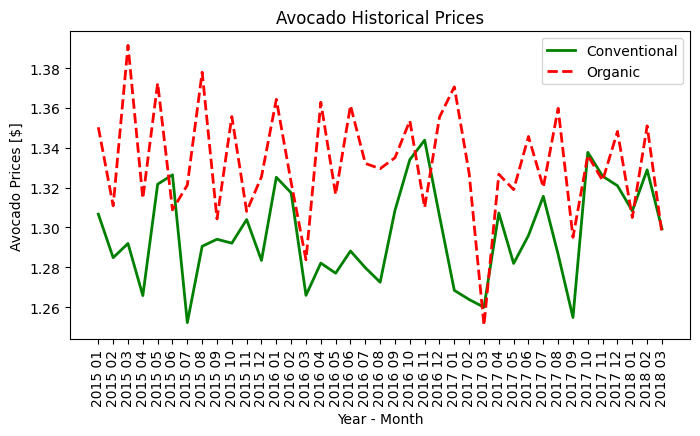

In [71]:
##Avocado Price Fluctuation

##Now we want to see the historical prices for the different types of avocadoes through time
#For that, we want to group the data into year-month and take the average of prices

price_historical_data = sqldf('''
                        
                        WITH CONVET_AVOCADO AS (
                        SELECT strftime('%Y %m', final_db.Date) Year_Month, AVG(final_db.AveragePrice) as conventional_avg_price

                        from final_df final_db

                        WHERE final_db.type IN ('conventional')

                        GROUP BY  Year_Month
                        
                        ORDER BY Year_Month asc
                        ),

                        ORGANIC_AVOCADO AS (
                        SELECT strftime('%Y %m', final_db.Date) Year_Month, AVG(final_db.AveragePrice) as organic_avg_price

                        from final_df final_db

                        WHERE final_db.type IN ('organic')

                        GROUP BY  Year_Month
                        
                        ORDER BY Year_Month asc
                        )

                    

                        


SELECT strftime('%Y %m', final_db.Date) Year_Mon,avg(CONVET_AVOCADO.conventional_avg_price) as 'Conventional Price', AVG(ORGANIC_AVOCADO.organic_avg_price) as 'Organic Price'

                        from final_df final_db

                        left join CONVET_AVOCADO on (strftime('%Y %m', final_db.Date)  = CONVET_AVOCADO.Year_Month)
                        
                        left join ORGANIC_AVOCADO on (strftime('%Y %m', final_db.Date) = ORGANIC_AVOCADO.Year_Month)

                        GROUP BY  Year_Mon
                        
                        ORDER BY Year_Mon asc


''')


        



print('Now we want to investigate the variation in the avocado prices throughout the years.\n')
print('For this we''ll need to group the date by the two different avocado types in a list and then plot it.\n')
print('The resulting query can be seen below.')
display(price_historical_data.head())
print('Now we want to see the historical variation of this price. Looking at this visualization, we can infer that the price')
print('is maintained inside a fixed band throughout the year. It''s also possible to observe that the organic variation tends')
print('to be more expensive in most of the analyzed cases.\n\n')
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(price_historical_data['Year_Mon'], price_historical_data['Conventional Price'],color='green',   
        linewidth=2)

ax.plot(price_historical_data['Year_Mon'], price_historical_data['Organic Price'], 
        color='red',   
        linewidth=2,  
        linestyle='--')

ax.set_xticklabels(price_historical_data['Year_Mon'], rotation=90)
ax.set_title('Avocado Historical Prices')
ax.set_ylabel('Avocado Prices [$]')
ax.set_xlabel('Year - Month')
ax.legend(['Conventional','Organic'])

plt.show()

AVOCADO LOVER PRICE SPENT PER AGE CORRELATION:



Here well agregate the avocado total spend per consumer age so we can get an age profile to analyse.
Its a nice insight to have if we want to define a focus group for advertisement or sales campaigns.




,Average Buyer Age,Consolidated Price [1k$]
0,15,396.37
1,16,396.30
2,17,476.88
3,18,424.95
4,19,601.45




Looking at the plot bellow, we can see that we have the most hits as an almost even line in the middle.
This means we have an evenly distributed consumer group and no age range gets the lead above the others.
In this case, the data suggest broader advertising campaigns, since it seems to have the same impact in all age ranges.




Text(0, 0.5, 'Total Purchase Spend [1K$]')

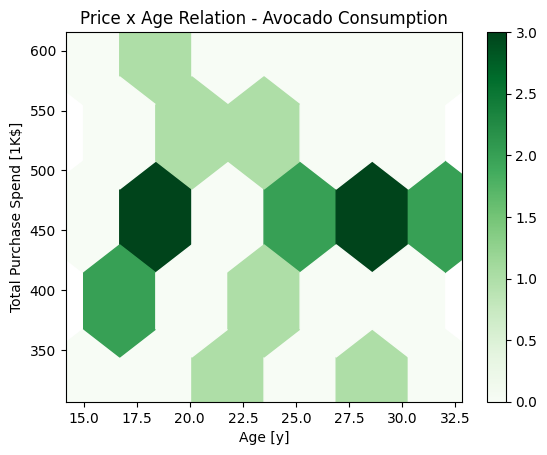

In [72]:
##Now I'd like to see the Age profile of our avocado lovers.
##I'd also like to correlate that with the money they spend in avocados, to understand which part of the population is most engaged in the
##Avocado Comunity. For This I'll use a Hex Bin plot.

pop_avoc_profil = sqldf('''
                        
                        Select final_df.'Average Buyer Age', round(AVG(final_df.'Small Bags Qty'*final_df.AveragePrice)/1000,2) as 'Consolidated Price [1k$]'

                        FROM final_df

                        group by 	final_df.'Average Buyer Age'
                        order by    final_df.'Average Buyer Age' asc

''')


print('\n\nHere we''ll agregate the avocado total spend per consumer age so we can get an age profile to analyse.')
print('It''s a nice insight to have if we want to define a focus group for advertisement or sales campaigns.\n\n')

display(pop_avoc_profil.head())

print('\n\nLooking at the plot bellow, we can see that we have the most hits as an almost even line in the middle.')
print('This means we have an evenly distributed consumer group and no age range gets the lead above the others.')
print('In this case, the data suggest broader advertising campaigns, since it seems to have the same impact in all age ranges.\n\n')


# plot:

# Control the color
plt.hexbin( pop_avoc_profil['Average Buyer Age'],pop_avoc_profil['Consolidated Price [1k$]'], gridsize=5, cmap=plt.cm.Greens)



plt.colorbar()

plt.title('Price x Age Relation - Avocado Consumption')
plt.xlabel("Age [y]")
plt.ylabel("Total Purchase Spend [1K$]")


AVOCADO LOVERS PREFERENCES PER AGE:



 Now we want to infer which gender/age combination has a preference for each type of avocado.

 For it well seggregate our data into a female database and a male database and use them to build two stackplots, which will allow us to see visually the preference for each type of avocado.

 A sample of the databases used in this plot is shown below:


,type,Predominant Buyer Gender,Average Buyer Age,Count
0,conventional,Female,15,119
1,organic,Female,15,124
2,conventional,Female,16,114
3,organic,Female,16,121
4,conventional,Female,17,134




Below we can see the visuals of the data above, segregated for each gender. Analysing the plots we can see that there is no true
distinction in clients preference. Which indicates that the usual avocado lover will buy the first kind of avocado he can get his hands on.


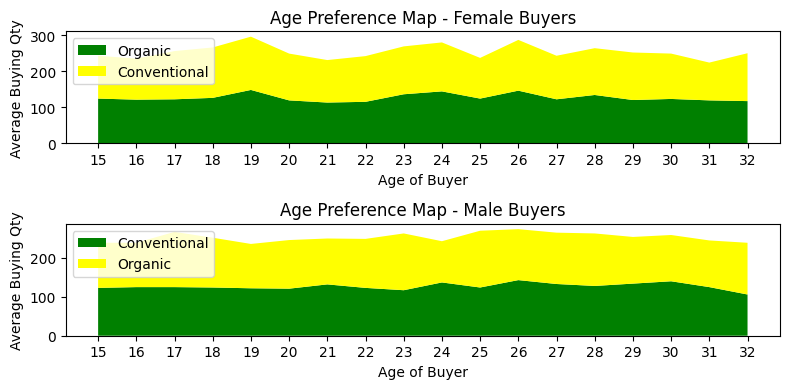

In [73]:
##NOW WE WANT TO INFER WHICH GENDER/AGE COMBINATION TENDS TO PREFER ORGANIC OR CLASSIC AVOCADO
## FOR THIS WE'LL USE A STACKED BAR PLOT

##first of all we need to collect the data from the dataframe

age_preference_male_df = sqldf('''

SELECT                  final_df.type,
                        final_df.'Predominant Buyer Gender',	
                        final_df.'Average Buyer Age',
                        count(final_df.type)  as Count           
                        
                        from final_df
                        where final_df.'Predominant Buyer Gender' in ('Male')
                        
        GROUP BY  final_df.type,	final_df.'Predominant Buyer Gender',	final_df.'Average Buyer Age'              
        ORDER BY final_df.'Average Buyer Age' ASC
''')

age_preference_female_df = sqldf('''

SELECT                  final_df.type,
                        final_df.'Predominant Buyer Gender',	
                        final_df.'Average Buyer Age',
                        count(final_df.type)  as Count           
                        
                        from final_df
                        where final_df.'Predominant Buyer Gender' in ('Female')
                        
        GROUP BY  final_df.type,	final_df.'Predominant Buyer Gender',	final_df.'Average Buyer Age'              
        ORDER BY final_df.'Average Buyer Age' ASC
''')


print('\n\n Now we want to infer which gender/age combination has a preference for each type of avocado.')
print('\n For it we''ll seggregate our data into a female database and a male database and use them to build two stackplots, which will allow us to see visually the preference for each type of avocado.')
print('\n A sample of the databases used in this plot is shown below:')
      
display(age_preference_female_df.head())



x = np.arange(len(gender_time_series))
width = 0.5


fig, ax = plt.subplots(2,1,figsize=(8,4))


print('\n\nBelow we can see the visuals of the data above, segregated for each gender. Analysing the plots we can see that there is no true')
print('distinction in clients preference. Which indicates that the usual avocado lover will buy the first kind of avocado he can get his hands on.')

##Now We'll make some graphics in order to get a better visualization of the data

##defining profile per type/gender for plots

ages = age_preference_female_df[age_preference_female_df.type=='conventional']['Average Buyer Age']
female_conv = age_preference_female_df[age_preference_female_df.type=='conventional']['Count']
female_org = age_preference_female_df[age_preference_female_df.type=='organic']['Count']

male_conv = age_preference_male_df[age_preference_male_df.type=='conventional']['Count']
male_org = age_preference_male_df[age_preference_male_df.type=='organic']['Count']

##Now We'll assembly the plots

ax[0].stackplot(ages, female_org,female_conv, labels = ['Organic','Conventional'],colors = ['Green','Yellow'])
ax[0].legend(loc='upper left')
ax[0].set_title('Age Preference Map - Female Buyers')
ax[0].set_xlabel('Age of Buyer')
ax[0].set_ylabel('Average Buying Qty')
ax[0].set_xticks(ages)

ax[1].stackplot(ages, male_org,male_conv, labels = ['Conventional','Organic'],colors = ['Green','Yellow'])
ax[1].legend(loc='upper left')
ax[1].set_title('Age Preference Map - Male Buyers')
ax[1].set_xlabel('Age of Buyer')
ax[1].set_ylabel('Average Buying Qty')
ax[1].set_xticks(ages)

fig.tight_layout()
plt.show()
 
## here i'll call the graphics as ax[0] and ax[1]
